Pull in data from datagov API here: http://www.ed.gov/developers

modules that have built in geo graphs - put data over state map pull in Oregon county school performance data

In [1]:
import urllib
import pandas as pd
import json
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot 

from sklearn.tree import DecisionTreeRegressor, export_graphviz

urlStudents = 'https://inventory.data.gov/api/action/datastore_search?resource_id=ea8517bd-a950-482a-bb63-e40736bbd7a4'
fileobjStudents = urllib.urlopen(urlStudents)
dataStudents = fileobjStudents.read()

In [2]:
parsed_json_students = json.loads(dataStudents)

In [3]:
#parsed_json_students['result']['records']

In [4]:
from pandas.io.json import json_normalize
students = json_normalize(parsed_json_students['result']['records'])

In [5]:
urlFinance = 'https://inventory.data.gov/api/action/datastore_search?resource_id=4dabce7c-756b-44d3-ac41-dfd162dfa93e'
fileobjFinanace = urllib.urlopen(urlFinance)
dataFinance = fileobjFinanace.read()
parsed_json_finance = json.loads(dataFinance)
finance = json_normalize(parsed_json_finance['result']['records'])

In [6]:
students.head(n=1)

,Eighth Grade Students,Eleventh Grade Students,Fifth Grade Students,First Grade Students,Fourth Grade Students,Free Lunch Eligible,Individualized Education Program,Kindergarten Students,LEP/ELL Students,Ninth Grade Students,...,Total Students- Black,Total Students- Hispanic,Total Students- Two or more Races,Total Students- White,Total Teachers,"Total, All Grades- female","Total, All Grades- male",Twelfth Grade Students,Ungraded Students,_id
0,57992,51962,59897,58448,59117,356929,81216,57665,17559,62615,...,261255,35389,2534,440519,49363.24,368003,387549,49719,None,1


In [7]:
finance.head(n=1)

,Federal Revenues,Instruction Expenditures,Loc Rev- Intermediate Agencies,Local Revenue- Subtotal,Non-Instruction Expenditures,State Name,State Revenues,Support Services Expenditures,Total Current Expend- Public El-Sec,Total Expenditures for Education,Total Revenues,_id
0,$1168015841,$3902381169,$26720185,$2244801388,$444114726,Alabama,$3800153264,$2324020814,$6670516709,$7646087117,$7239690678,1


In [8]:
#change columns to lower case, remove whitespace and trim ends
students.columns = [x.lower() for x in students.columns]
students.columns = [x.replace(' ','') for x in students.columns]
students.columns

Index([u'eighthgradestudents', u'eleventhgradestudents', u'fifthgradestudents',
       u'firstgradestudents', u'fourthgradestudents', u'freeluncheligible',
       u'individualizededucationprogram', u'kindergartenstudents',
       u'lep/ellstudents', u'ninthgradestudents', u'prekindergartenstudents',
       u'pupil/teacherratio', u'reduced-priceluncheligible',
       u'secondgradestudents', u'seventhgradestudents', u'sixthgradestudents',
       u'statename', u'tenthgradestudents', u'thirdgradestudents',
       u'totalnumberofschools', u'totalstaff', u'totalstudents',
       u'totalstudents-amerind/aknative',
       u'totalstudents-asian/pacificislander', u'totalstudents-black',
       u'totalstudents-hispanic', u'totalstudents-twoormoreraces',
       u'totalstudents-white', u'totalteachers', u'total,allgrades-female',
       u'total,allgrades-male', u'twelfthgradestudents', u'ungradedstudents',
       u'_id'],
      dtype='object')

In [9]:
#students[list(students.columns[[8]])] 

includeFields = [ 'freeluncheligible','individualizededucationprogram','lep/ellstudents', 'pupil/teacherratio',
                'reduced-priceluncheligible', 'statename', 'totalnumberofschools', 'totalstaff', 'totalstudents',
                'totalstudents-amerind/aknative','totalstudents-asian/pacificislander', 'totalstudents-black',
                'totalstudents-hispanic', 'totalstudents-twoormoreraces', 'totalstudents-white', 
                'totalteachers', 'total,allgrades-female',  'total,allgrades-male']

#students1 = students[students.columns[ListInclude]]
students1 = students.ix[:,includeFields]

#students[students.colnames[ListInclude]]
#students[list(students.columns[5:7] | students.columns[[8]] | students.columns[11:13] | students.columns[16] | )] 


#col_start = students.columns.get_loc('totalnumberofschools')
#col_end = students.columns.get_loc('total,allgrades-male')
#student_setb = students.ix[:,col_start:col_end+1]
#student_setb.head(n=3)


In [10]:
#students.tail(n=10)
#iloc if send a number students.iloc[0:3,2] - python with just return the series
#but if include  brackets around single digit OR slice then python will return df students.iloc[0:3:,0:1] students.iloc[0:3,[1]]
students1.iloc[0:3:,0:3]


,freeluncheligible,individualizededucationprogram,lep/ellstudents
0,356929,81216,17559
1,42028,18048,14963
2,374905,125806,76320


In [11]:
listNumbers = includeFields
listNumbers.remove('statename')
listNumbers

['freeluncheligible',
 'individualizededucationprogram',
 'lep/ellstudents',
 'pupil/teacherratio',
 'reduced-priceluncheligible',
 'totalnumberofschools',
 'totalstaff',
 'totalstudents',
 'totalstudents-amerind/aknative',
 'totalstudents-asian/pacificislander',
 'totalstudents-black',
 'totalstudents-hispanic',
 'totalstudents-twoormoreraces',
 'totalstudents-white',
 'totalteachers',
 'total,allgrades-female',
 'total,allgrades-male']

In [12]:
#this only works if I do one individual series first - then try on multiple
#students1.ix[:,listNumbers] = students1.ix[:,listNumbers].astype(float)
#students1.info()
#does not work but watch this..
#students1['totalstudents'] = students1['totalstudents'].astype(float)
#students1.ix[:,listNumbers] = students1.ix[:,listNumbers].astype(float)
#students1.info()

In [13]:
#what about apply or mapapply - how could I have used those here
#pd_numeric would not work: pd.to_numeric(students1, errors='ignore')
#loop through column titles to cast the types for numeric variables

students2 = pd.DataFrame()

for c in students1.columns:
    if c == 'pupil/teacherratio':
        students2[c] = students1[c].astype(float)
    
    elif not c == 'statename':
        students2[c] = students1[c].astype(float) / students1['totalstudents'].astype(float)
    
    else:
        students2[c] = students1[c]

In [14]:
#Get performance data from NAEP: https://inventory.data.gov/dataset/c25ae6bf-66c3-4a7d-867f-2cceeba5c039/resource/c9a98ee3-e3b3-4b0b-ac26-8378c18b4550
urlPerformance = 'https://inventory.data.gov/api/action/datastore_search?resource_id=c9a98ee3-e3b3-4b0b-ac26-8378c18b4550'
fileobjPerformance = urllib.urlopen(urlPerformance)
dataPerformance = fileobjPerformance.read()

In [15]:
parsed_json_performance = json.loads(dataPerformance)
performance = json_normalize(parsed_json_performance['result']['records'])
performance = performance.replace('',np.nan)
#change columns to lower case, remove whitespace and trim ends
performance.columns = [x.lower() for x in performance.columns]
performance.columns = [x.replace(' ','') for x in performance.columns]

In [16]:
perform1 = performance.iloc[:,8:16]
perform2 = performance['statename']
perform3 = pd.concat([perform1, perform2], axis=1)

In [17]:
perform3_numeric = pd.DataFrame()

for c in perform3.columns:
    if not c == 'statename':
        perform3_numeric[c] = perform3[c].str.rstrip(to_strip='%').astype(float, raise_on_error=False)/100
    
    else: perform3_numeric[c] = perform3[c]

In [18]:
perform3_numeric.describe()

,%ofstudentsatorabovebasic-grade4math,%ofstudentsatorabovebasic-grade4reading,%ofstudentsatorabovebasic-grade4science,%ofstudentsatorabovebasic-grade4writing,%ofstudentsatorabovebasic-grade8math,%ofstudentsatorabovebasic-grade8reading,%ofstudentsatorabovebasic-grade8science,%ofstudentsatorabovebasic-grade8writing
count,52.000000,52.000000,45.000000,45.000000,52.000000,52.000000,45.000000,46.000000
mean,0.817692,0.667692,0.688444,0.848444,0.724231,0.737885,0.608222,0.877174
std,0.067957,0.077576,0.091675,0.046268,0.087455,0.076166,0.101316,0.031879
min,0.560000,0.390000,0.450000,0.730000,0.400000,0.480000,0.400000,0.800000
25%,0.780000,0.627500,0.640000,0.820000,0.677500,0.700000,0.530000,0.852500
50%,0.835000,0.685000,0.700000,0.850000,0.750000,0.750000,0.630000,0.880000
75%,0.862500,0.730000,0.760000,0.880000,0.780000,0.790000,0.670000,0.900000
max,0.920000,0.810000,0.830000,0.940000,0.860000,0.850000,0.770000,0.950000


In [19]:
combined = pd.merge(perform3_numeric, students2, on='statename')
#combined.describe()
combined.columns

Index([   u'%ofstudentsatorabovebasic-grade4math',
       u'%ofstudentsatorabovebasic-grade4reading',
       u'%ofstudentsatorabovebasic-grade4science',
       u'%ofstudentsatorabovebasic-grade4writing',
          u'%ofstudentsatorabovebasic-grade8math',
       u'%ofstudentsatorabovebasic-grade8reading',
       u'%ofstudentsatorabovebasic-grade8science',
       u'%ofstudentsatorabovebasic-grade8writing',
                                     u'statename',
                             u'freeluncheligible',
                u'individualizededucationprogram',
                               u'lep/ellstudents',
                            u'pupil/teacherratio',
                    u'reduced-priceluncheligible',
                          u'totalnumberofschools',
                                    u'totalstaff',
                                 u'totalstudents',
                u'totalstudents-amerind/aknative',
           u'totalstudents-asian/pacificislander',
                           u'to

In [20]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 12 columns):
Federal Revenues                        52 non-null object
Instruction Expenditures                52 non-null object
Loc Rev- Intermediate Agencies          52 non-null object
Local Revenue- Subtotal                 52 non-null object
Non-Instruction Expenditures            52 non-null object
State Name                              52 non-null object
State Revenues                          52 non-null object
Support Services Expenditures           52 non-null object
Total Current Expend- Public El-Sec     52 non-null object
Total Expenditures for Education        52 non-null object
Total Revenues                          52 non-null object
_id                                     52 non-null int64
dtypes: int64(1), object(11)
memory usage: 5.3+ KB


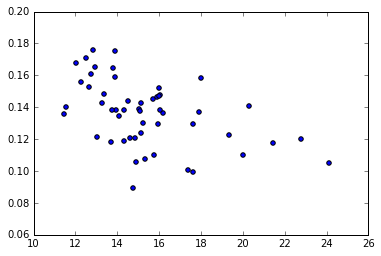

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(combined['pupil/teacherratio'], combined['individualizededucationprogram'], )

# plt.figure(figsize=(20,10))
# state_group = combined.groupby('statename')
# state_totals = state_group.sum() 
# state_totals.plot(y = 'freeluncheligible', kind = 'bar')
#plt.plot(x = students2['statename'],y = students2['freeluncheligible'], kind = 'bar')
#plt.show()

In [22]:
graphFields = [ '%ofstudentsatorabovebasic-grade4reading',
                                     'statename',
                             'freeluncheligible',
                'individualizededucationprogram',
                               'lep/ellstudents',
                            'pupil/teacherratio',
                    'reduced-priceluncheligible',]

In [23]:
graphdata = combined.ix[:,graphFields]

In [24]:
#graphdata = combined.ix[:,graphFields]
graphdata['color'] = ["r" if statename == "Oregon" else "b" for statename in graphdata.statename.unique()]

Based on the plots below, there appears does to be a relationship between 4th grade reading and the following attributes:
free or reduced lunch, ratio of students eligible for sped, ratio of Eng Lang Learners, teacher to student ratio

C:\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


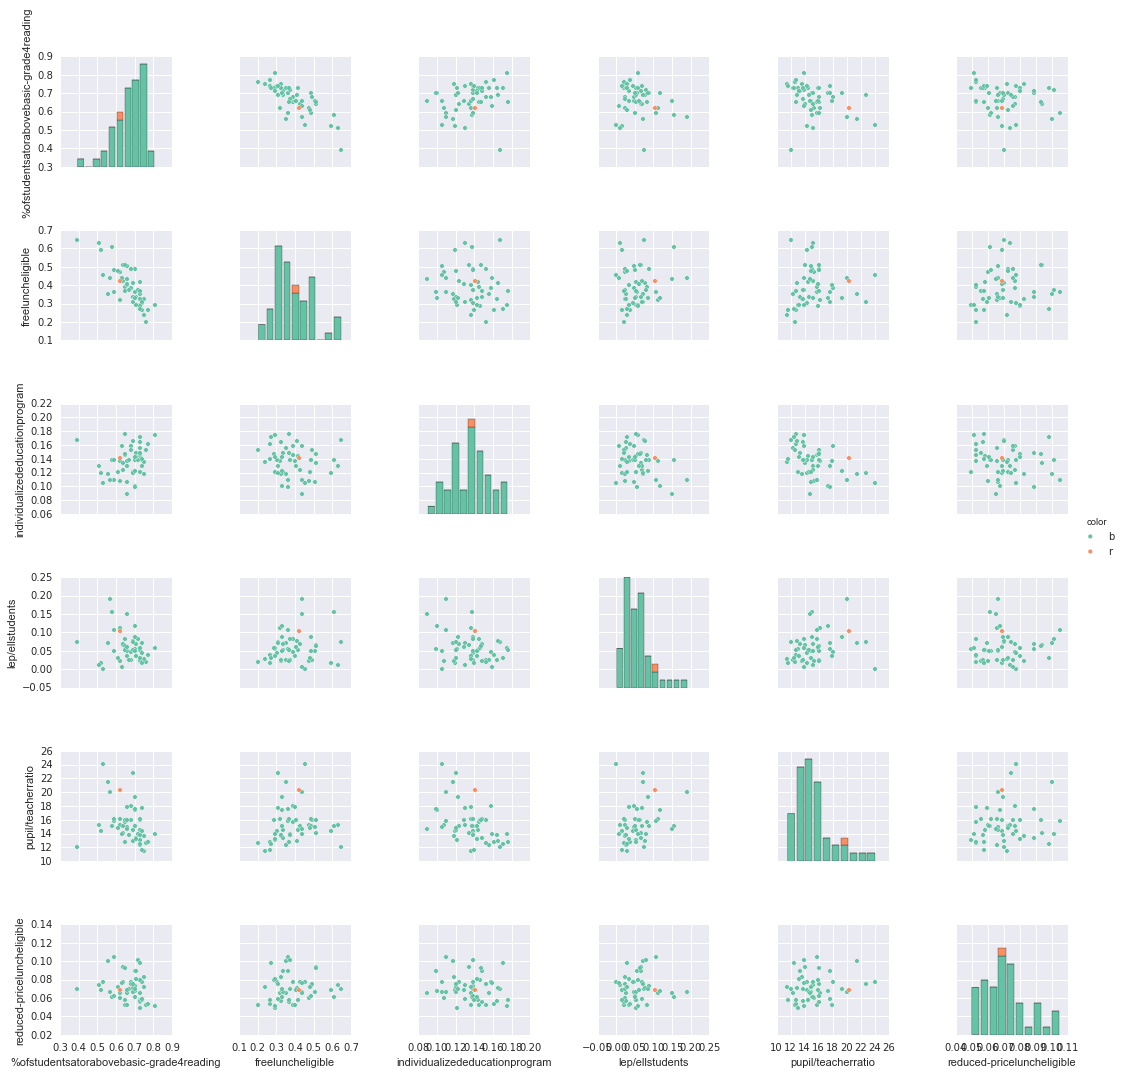

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as pltmport 
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_color_codes()
g = sns.pairplot(data = graphdata.dropna(), hue="color", palette = "Set2").fig.show()


In [26]:
model1X = graphdata[['freeluncheligible','individualizededucationprogram'
                     ,'lep/ellstudents', 'pupil/teacherratio', 'reduced-priceluncheligible']]
model1Y = graphdata['%ofstudentsatorabovebasic-grade4reading']
features =['freeluncheligible','individualizededucationprogram'
                     ,'lep/ellstudents', 'pupil/teacherratio', 'reduced-priceluncheligible']
model1x = sm.add_constant(model1X)
model1 = sm.OLS(model1Y, model1x)
results1 = model1.fit()
print (results1.summary())

                                       OLS Regression Results                                      
Dep. Variable:     %ofstudentsatorabovebasic-grade4reading   R-squared:                       0.668
Model:                                                 OLS   Adj. R-squared:                  0.632
Method:                                      Least Squares   F-statistic:                     18.48
Date:                                     Tue, 29 Mar 2016   Prob (F-statistic):           5.00e-10
Time:                                             18:37:19   Log-Likelihood:                 88.301
No. Observations:                                       52   AIC:                            -164.6
Df Residuals:                                           46   BIC:                            -152.9
Df Model:                                                5                                         
Covariance Type:                                 nonrobust                                         


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets


def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = [ "dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")



# # Decision Tree Regression
# rlt = DecisionTreeRegressor(min_samples_split=4, random_state=99)
# rlt.fit(model1X, model1Y)

#dot_file = tree.export_graphviz(rlt.tree_, out_file='tree_d1.dot', feature_names=features)  #export the tree to .dot file
# #dot_file.close() #close that dot file.



In [28]:
visualize_tree(rlt, features)

NameError: name 'rlt' is not defined